## Bifid titkosírás törése szimulált lehűtéssel

In [1]:
%pylab inline
import numpy as np
from __future__ import print_function
from matplotlib import pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
def c2n(c):
    return ord(c)-65

def n2c(n):
    return chr(n+65)

def vissza_tabla_keszit(oda_tabla):
    vt1 = [0]*25
    vt2 = [0]*25
    for i in range(5):
        for j in range(5):
            vt1[oda_tabla[i,j]]=i
            vt2[oda_tabla[i,j]]=j
    return vt1,vt2

def uj_tabla():
    oda_tabla = np.random.permutation(25).reshape((5,5))
    vt1,vt2 = vissza_tabla_keszit(oda_tabla)
    return oda_tabla,vt1,vt2

def koordinatak(c,vt1,vt2):
    hol = c2n(c)
    return (vt1[hol],vt2[hol])

def kodol(blokk,oda_tabla,vt1,vt2):
    l = len(blokk)
    t = [0]*(l*2)
    for u in range(l):
        koord = koordinatak(blokk[u],vt1,vt2)
        t[u] = koord[0]
        t[u+l] = koord[1]
    t2 = ""
    for u in range(l):
        t2 += n2c(oda_tabla[t[u*2],t[u*2+1]])
    return t2

def dekodol(blokk,oda_tabla,vt1,vt2):
    l = len(blokk)
    t = [0]*(l*2)
    for u in range(l):
        koord = koordinatak(blokk[u],vt1,vt2)
        t[u*2] = koord[0]
        t[u*2+1] = koord[1]
    t2 = ""
    for u in range(l):
        t2 += n2c(oda_tabla[t[u],t[u+l]])
    return t2

def kodol_full(szoveg,oda_tabla,vt1,vt2,blokk_meret):
    blokkok = len(szoveg)/blokk_meret
    titkos = ""
    for b in range(blokkok+1):
        titkos += kodol(szoveg[(b*blokk_meret):(b+1)*blokk_meret],oda_tabla,vt1,vt2)
    return titkos

def dekodol_full(titkos,oda_tabla,vt1,vt2,blokk_meret):
    blokkok = len(titkos)/blokk_meret
    dekodolt = ""
    for b in range(blokkok+1):
        dekodolt += dekodol(titkos[(b*blokk_meret):(b+1)*blokk_meret],oda_tabla,vt1,vt2)
    return dekodolt

In [3]:
oda_titkos_tabla,vt_titkos_1,vt_titkos_2 = uj_tabla()

In [4]:
uzenet = "HOLLARIHO"
titkos = kodol(uzenet,oda_titkos_tabla,vt_titkos_1,vt_titkos_2)
dekod  = dekodol(titkos,oda_titkos_tabla,vt_titkos_1,vt_titkos_2)
titkos,dekod

('MCAEHRAPD', 'HOLLARIHO')

In [5]:
with open("szoveg_preproc.txt") as f:
    nyers = f.readline()
titkos = kodol_full(nyers,oda_titkos_tabla,vt_titkos_1,vt_titkos_2,8)
print(titkos)

ONTRBRESDRVYUSSOLEOIQTSGORWVUPPEJWVWOPEEWAOJSLUEBPTGEEHETIWWHMESAIIXYGKBLOBFBROSBSYIDPODWYIHBMXTOVWUTOBMOLGATAMYBVYUISODUAFTKYYOORYCSLWAURNFOLRMONGRXGMANEELGOSMDWOSMPUBIAATKUMHIDGDMJMIQTKDRHRWUBIBYTXQBANERMSMUWPIAQBMRGODWMTIWFOKSYRUPWKPULKRVQWNSUGNRNEILTUCMGUWTWOPCSWNNHOESROIRFSHYNWTMRIHBUCNDASRLIBFBKVSMRMUDJJOUBVPVDEWWCAABBRTOGPOHMITOGWPBOQBIRGOMWMXNGKBAANRDNTGERUWAACDSRSOIUORCMTTRLMRDAOQTLIOOQKVOYLOXFVMRVIRLESTIINSHQEHRAGSMYSOOYKOHFUTUEIRSYKAANKWPGWBNURVDABTPRNVPMKKNBTRGRHBWSMRKJASTUWPHOQBISGNMHWEBCSPONOPPVJURSWDVLGRSOALTWEAHKACABTWPRHBWNSVOEAXAEKNSNERVOWTOTSHUWPIOQBMSGIWHWOBFONTMXGHIRGUMWSOOJOLGMTOLMGNSUWEIWQGKSOATWRWHKGSGRXREMHOWNTGAEHESOMXOMAEEIJRWQWYYVWJVEPMOFUGTOVSTRHOHLYTCOFOKUASAUINRYFRYAYROSDQTUSOWTRUJOSJMTVMWSRSBMSVJWRSMBWMRDRVSUSSLAGWMKMBOJOYGMTHGGOXWSMHOAVRRMEACRRRSOSLLFOGDYBOWPIAQBMLURDQMBEEODQTTIRHPRAGWOKMWOLRBSVTEWAGHBKMWNTWBRUBSHYRDWDNHONOEXGJSNDWBRWBRAGWOHAQPIRBBMYDADNSKOEVNEVTMLSOOTUWSHOQPINOBMMJJWUTWBOOTROBHLVDJOARMTSFMOAOQROUFNVFAOKTOSJWTVMBNWIUONVORTRDLHMBWJODMMTU

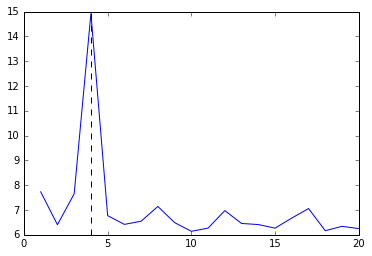

In [6]:
bigrams = [dict() for i in range(20)]
hossz = len(titkos)
for t in range(hossz):
    for s in range(np.max([0,t-20]),t):
        bigram = titkos[t]+titkos[s]
        if bigram in bigrams[t-s-1]:
            bigrams[t-s-1][bigram] += 1
        else:
            bigrams[t-s-1][bigram] = 1
variancia = [np.var(bigrams[i].values()) for i in range(20)]
plt.plot(np.arange(1,21),variancia)
plt.axvline(np.argmax(variancia)+1,color="black",ls="--")

In [7]:
qgram = np.zeros((26,26,26,26))
with open("english_quadgrams.txt") as f:
    sorok = f.readlines()
    for sor in sorok:
        qg,szam = sor.split(" ")
        qgram[c2n(qg[0]),c2n(qg[1]),c2n(qg[2]),c2n(qg[3])] = int(szam)
    qgram = np.log1p(qgram/sum(qgram))   

In [8]:
def qgram_pont(s):
    pont = 0.0
    qgram_szam = len(s)-3
    for i in range(qgram_szam):
        pont += qgram[c2n(s[i]),c2n(s[i+1]),c2n(s[i+2]),c2n(s[i+3])]
    return pont/(qgram_szam)

In [11]:
oda_proba_tabla = np.random.permutation(25).reshape((5,5))
blokk_meret = (np.argmax(variancia)+1)*2
pont,utso_pont,kesz = 0,-1,0
for t in np.linspace(10,0,500)/1e7:
    acc = 0.0
    for e in range(1000):
        i = np.random.randint(5,size=4)
        uj_t = np.copy(oda_proba_tabla)
        uj_t[i[0],i[1]],uj_t[i[2],i[3]] = uj_t[i[2],i[3]],uj_t[i[0],i[1]]
        uj_t_vt1, uj_t_vt2 = vissza_tabla_keszit(uj_t)
        uj_pont = qgram_pont(dekodol_full(titkos,uj_t,uj_t_vt1,uj_t_vt2,blokk_meret))
        
        kulonbseg = uj_pont-pont
        elfogad = np.exp(kulonbseg/t)
        if np.random.rand()<elfogad:
            oda_proba_tabla = np.copy(uj_t)
            pont,utso_pont = uj_pont,pont
            acc += 1
    print("\r","Fittness: ",pont," acc: ",acc/1000,end='     ')
    
    if pont == utso_pont:
        kesz += 1
    else:
        kesz = 0
    
    if kesz == 10:
        print("Kesz.")
        break

 Fittness:  0.000189653646251  acc:  0.045     Kesz.


In [12]:
oda_proba_tabla

array([[ 2, 11, 24,  5, 21],
       [15, 13, 18,  6,  0],
       [10,  1, 12,  7, 14],
       [23, 16, 19,  9,  3],
       [ 8, 17,  4, 20, 22]])

In [13]:
oda_titkos_tabla

array([[22, 17,  4,  8, 20],
       [ 0, 13, 18, 15,  6],
       [14,  1, 12, 10,  7],
       [21, 11, 24,  2,  5],
       [ 3, 16, 19, 23,  9]])

In [14]:
vt_proba_1,vt_proba_2 = vissza_tabla_keszit(oda_proba_tabla)
dekodol_full(titkos,oda_proba_tabla,vt_proba_1,vt_proba_2,blokk_meret)

'MRANDMRSDURSLEYOFNUMBERFOURPRIVETDRIVEWEREPROUDTOSAYTHATTHEYWEREPERFECTLYNORMALTHANKYOUVERYMUCHTHEYWERETHELASTPEOPLEYOUDEXPECTTOBEINVOLVEDINANYTHINGSTRANGEORMYSTERIOUSBECAUSETHEYJUSTDIDNTHOLDWITHSUCHNONSENSEMRDURSLEYWASTHEDIRECTOROFAFIRMCALLEDGRUNNINGSWHICHMADEDRILLSHEWASABIGBEEFYMANWITHHARDLYANYNECKALTHOUGHHEDIDHAVEAVERYLARGEMUSTACHEMRSDURSLEYWASTHINANDBLONDEANDHADNEARLYTWICETHEUSUALAMOUNTOFNECKWHICHCAMEINVERYUSEFULASSHESPENTSOMUCHOFHERTIMECRANINGOVERGARDENFENCESSPYINGONTHENEIGHBORSTHEDURSLEYSHADASMALLSONCALLEDDUDLEYANDINTHEIROPINIONTHEREWASNOFINERBOYANYWHERETHEDURSLEYSHADEVERYTHINGTHEYWANTEDBUTTHEYALSOHADASECRETANDTHEIRGREATESTFEARWASTHATSOMEBODYWOULDDISCOVERITTHEYDIDNTTHINKTHEYCOULDBEARITIFANYONEFOUNDOUTABOUTTHEPOTTERSMRSPOTTERWASMRSDURSLEYSSISTERBUTTHEYHADNTMETFORSEVERALYEARSINFACTMRSDURSLEYPRETENDEDSHEDIDNTHAVEASISTERBECAUSEHERSISTERANDHERGOODFORNOTHINGHUSBANDWEREASUNDURSLEYISHASITWASPOSSIBLETOBETHEDURSLEYSSHUDDEREDTOTHINKWHATTHENEIGHBORSWOULDSAYIFTHEPOTTERSARRIVEDINTHESTREETTHED

In [16]:
dekodol_full(titkos,oda_titkos_tabla,vt_titkos_1,vt_titkos_2,blokk_meret)

'MRANDMRSDURSLEYOFNUMBERFOURPRIVETDRIVEWEREPROUDTOSAYTHATTHEYWEREPERFECTLYNORMALTHANKYOUVERYMUCHTHEYWERETHELASTPEOPLEYOUDEXPECTTOBEINVOLVEDINANYTHINGSTRANGEORMYSTERIOUSBECAUSETHEYJUSTDIDNTHOLDWITHSUCHNONSENSEMRDURSLEYWASTHEDIRECTOROFAFIRMCALLEDGRUNNINGSWHICHMADEDRILLSHEWASABIGBEEFYMANWITHHARDLYANYNECKALTHOUGHHEDIDHAVEAVERYLARGEMUSTACHEMRSDURSLEYWASTHINANDBLONDEANDHADNEARLYTWICETHEUSUALAMOUNTOFNECKWHICHCAMEINVERYUSEFULASSHESPENTSOMUCHOFHERTIMECRANINGOVERGARDENFENCESSPYINGONTHENEIGHBORSTHEDURSLEYSHADASMALLSONCALLEDDUDLEYANDINTHEIROPINIONTHEREWASNOFINERBOYANYWHERETHEDURSLEYSHADEVERYTHINGTHEYWANTEDBUTTHEYALSOHADASECRETANDTHEIRGREATESTFEARWASTHATSOMEBODYWOULDDISCOVERITTHEYDIDNTTHINKTHEYCOULDBEARITIFANYONEFOUNDOUTABOUTTHEPOTTERSMRSPOTTERWASMRSDURSLEYSSISTERBUTTHEYHADNTMETFORSEVERALYEARSINFACTMRSDURSLEYPRETENDEDSHEDIDNTHAVEASISTERBECAUSEHERSISTERANDHERGOODFORNOTHINGHUSBANDWEREASUNDURSLEYISHASITWASPOSSIBLETOBETHEDURSLEYSSHUDDEREDTOTHINKWHATTHENEIGHBORSWOULDSAYIFTHEPOTTERSARRIVEDINTHESTREETTHED